<a href="https://colab.research.google.com/github/Mananvanawat/MNIST-handwritten-digit-prediction/blob/main/MNIST_handwritten_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

11493376/11490434 [==============================] - 0s 0us/step


The MNIST Handwritten Digit is a dataset for evaluating machine learning 
and deep learning models on the handwritten digit classification problem,
 it is a dataset of 60,000 small square 28×28 pixel grayscale images of 
 handwritten single digits between 0 and 9.

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

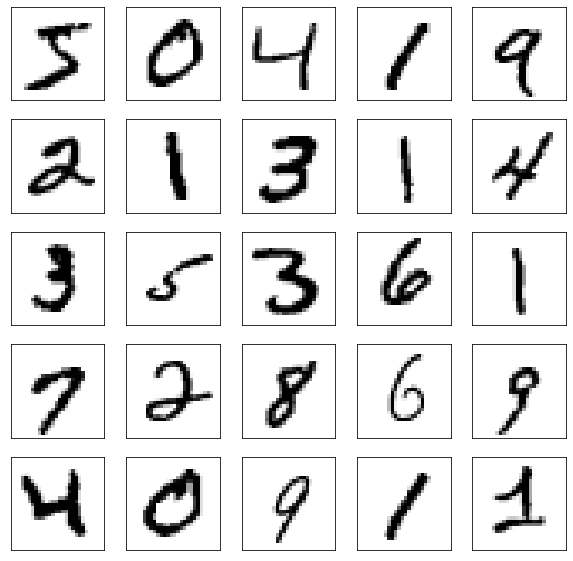

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

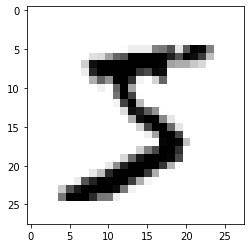

In [14]:
plt.imshow(x_train[0],cmap=plt.cm.binary) 

Before we feed the data into the neural network we need to normalize it by scaling the pixels value in a range from 0 to 1 instead of being from 0 to 255 and that make the neural network needs less computational power:

In [17]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

**Build the model**

Now, we are going to build the model or in other words the neural network that will train and learn how to classify these images.

In [18]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

**Compile the model**

Since we finished building the neural network we need to compile the model by adding some few parameters that will tell the neural network how to start the training process.

In [19]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

**Train the model**

We are ready to train our model, we call the fit subpackage and feed it with the training data and the labeled data that correspond to the training dataset and how many epoch should run or how many times should make a guess.

In [20]:
model.fit(x=x_train, y=y_train, epochs=5) # Start training process

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4640 - accuracy: 0.8681
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9878


In [21]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9732

Test accuracy: 0.9732000231742859


In [22]:
predictions = model.predict([x_test]) # Make prediction

Consider rewriting this model with the Functional API.


In [26]:
import numpy as np
np.argmax(predictions[1000])

9

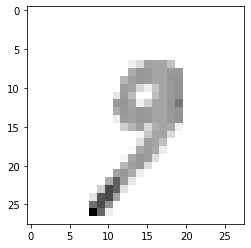

In [23]:
plt.imshow(x_test[1000], cmap=plt.cm.binary) # Import the image
plt.show() # Show the image

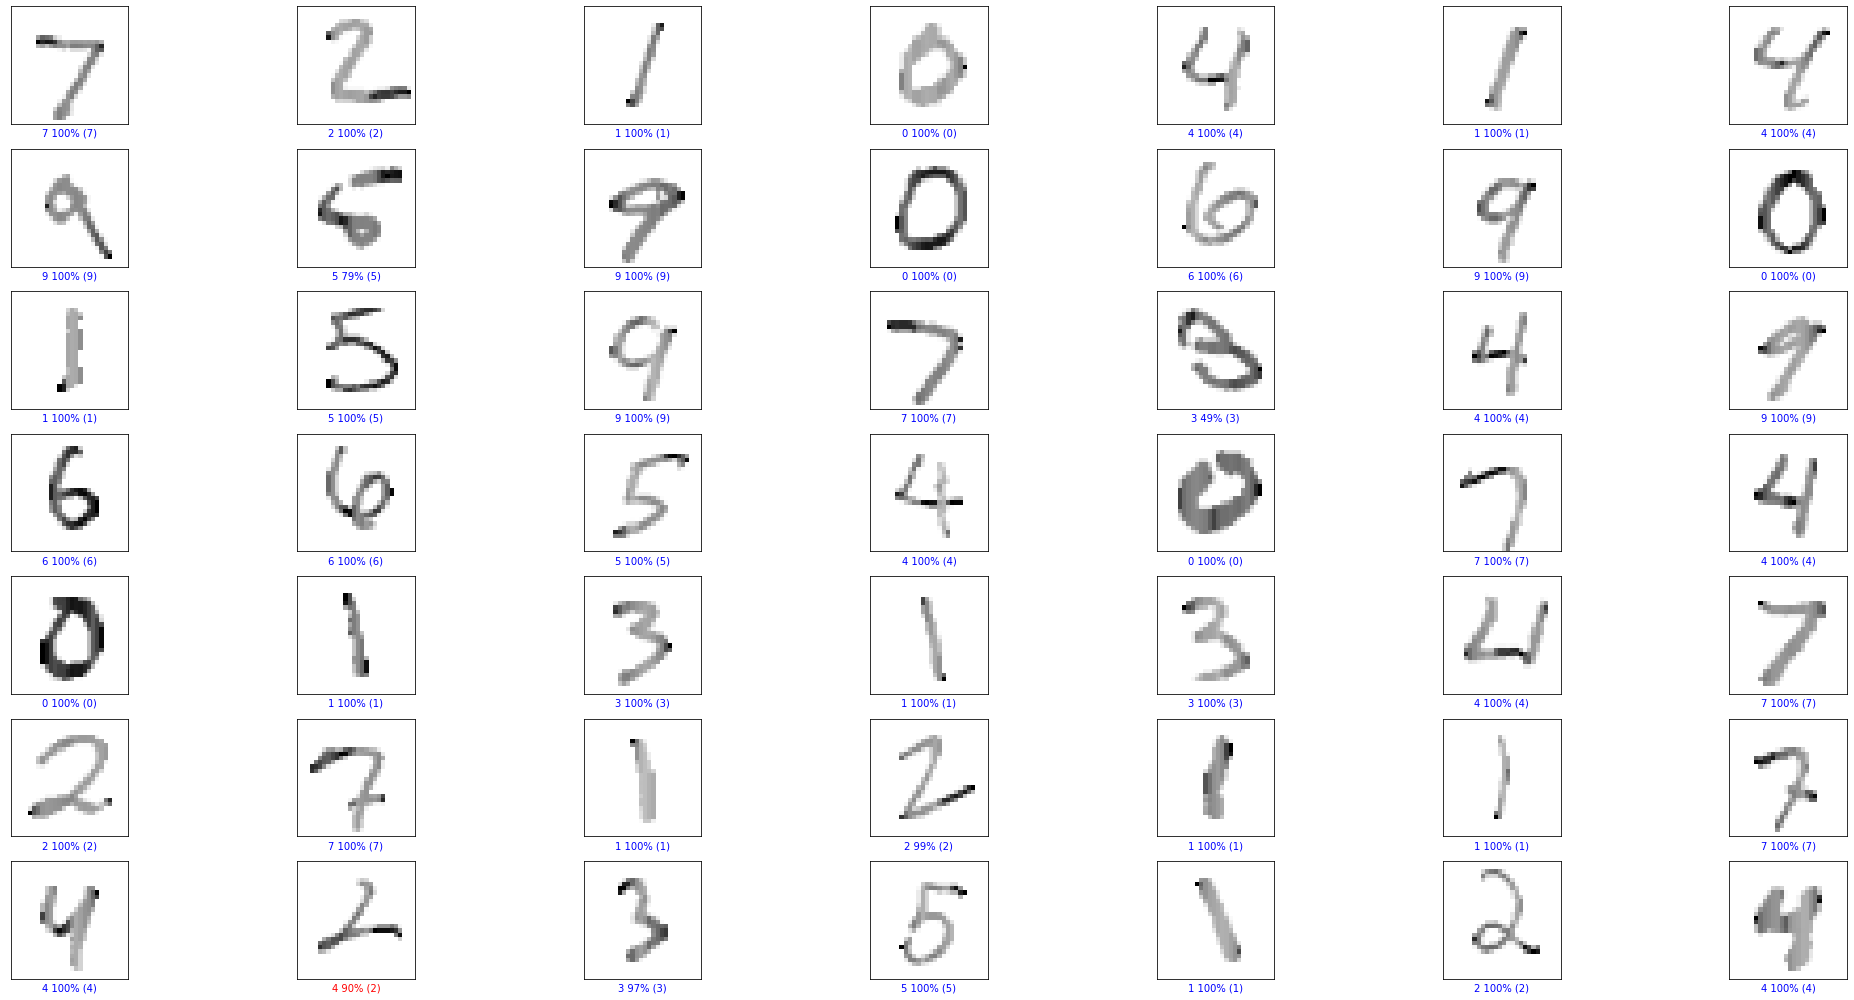

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
num_rows = 7
num_cols = 7
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i],y_test,x_test)
  
  
plt.tight_layout()
plt.show()